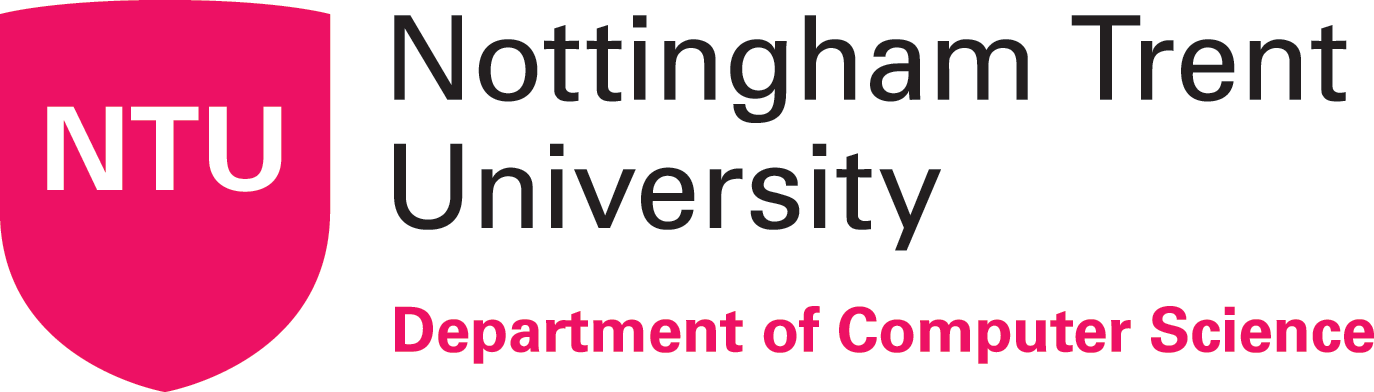

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name: Allwyn Kodemelu
## NTU ID: N1306612

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

# Start your answer here-

<font  color= 'green'> **GitHub Link to access your activity.** </font>

Link to GitHub Repository: <a href="https://github.com/">(Click here)</a>

# Section 1: Control Structures (16 marks)


# Explanation and Documentation 
In this section the data set is loaded and read.The cleaned data is called again here in the section to ensure the cleaned data is loaded for accurate results. The code calculates the average goals per shot by dividing the Goals column by the Shots column for each match and then finding the mean of this ratio.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog, ttk

# Load the dataset
file_path = '/Users/allwynkodemelu/Downloads/ManUtd 2023 Match Statistics.csv'
md = pd.read_csv(file_path)

# Clean the dataset by handling missing values, duplicates, and ensuring valid data types
# Drop rows with NaN in all columns except specified ones as they contain non numerical values.
exclude_columns = ['Date', 'Opponent', 'Venue', 'Result']
columns_to_check = [col for col in md.columns if col not in exclude_columns]
md.dropna(subset=columns_to_check, inplace=True)

# Convert all columns to numeric where possible, except specified columns
for col in md.columns:
    if col not in exclude_columns:
        md[col] = pd.to_numeric(md[col], errors='coerce')

# Fill NaN values with zero in all columns except the excluded ones
md.fillna({col: 0 for col in md.columns if col not in exclude_columns}, inplace=True)

# Drop duplicate rows
md.drop_duplicates(inplace=True)

In [8]:
# Section 1: Control Structures
if md is not None and {'Goals', 'Shots'}.issubset(md.columns):
    if (md['Shots'] > 0).any():
        average_goals_per_shot = (md['Goals'] / md['Shots']).mean()
        print(f"Average Goals Per Shot: {average_goals_per_shot:.2f}")
    else:
        print("Error: 'Shots' column contains only zero or missing values.")
else:
    print("Dataset not loaded or required columns are missing.")

Average Goals Per Shot: 0.11


# Reflection on results 
The above code calculates the team's shooting efficiency. HIgher the value indicates better performance in converting shots into goals. The dataset is validated here to check if the required columns for calculation are present in the dataset. If they are not available an error message is shown.

# Section 2: Functions and Modules (16 marks)  

# Explanation and Documentation 
The dataset is into the pandas DataFrame and calculates two performance metrics: the average goals scored (Goals) and the total points earned (Points). It uses reusable functions to compute the average and sum of specified columns while validating their existence. The approach ensures robustness by handling missing or invalid data and provides insights into team performance.

In [13]:
import pandas as pd
file_path ='/Users/allwynkodemelu/Downloads/ManUtd 2023 Match Statistics.csv'
md = pd.read_csv(file_path)

def calculate_average(column_name, file_path):
    """Calculate and return the average of a column with detailed output."""
    if column_name not in file_path.columns:
        print(f"Error: Column '{column_name}' not found in the dataset.")
        return None

    average_value = file_path[column_name].mean()
    print(f"The average value for '{column_name}' is: {average_value}")
    return average_value

def calculate_sum(column_name, file_path):
    """Calculate and return the sum of a column with detailed output."""
    if column_name not in file_path.columns:
        print(f"Error: Column '{column_name}' not found in the dataset.")
        return None

    total_value = file_path[column_name].sum()
    print(f"The total value for '{column_name}' is: {total_value}")
    return total_value

average_goals = calculate_average('Goals', md)
total_points = calculate_sum('Points', md)


The average value for 'Goals' is: 1.7419354838709677
The total value for 'Points' is: 132


# Reflection on results 
The calculation of the average value for the 'Goals' column provides an overview of the team's scoring efficiency across matches. he total sum of the 'Points' column indicates the team's overall success in accumulating points, a direct measure of performance in a league or competition.Results can be benchmarked against previous seasons or other teams to identify areas of strength or improvement.

# Section 3: Data Handling with Pandas (16 marks)  

# Explanation and Documentation 
This code demonstrates a comprehensive approach to handling a football match dataset for data preparation and analysis. It starts by loading the dataset into a pandas DataFrame and ensures the data is clean and reliable. Key cleaning steps include dropping rows with missing values in critical columns, converting relevant columns to numeric data types, filling missing numeric values with zeros, and removing duplicate rows to maintain data integrity. Once cleaned, the dataset is analyzed to extract meaningful insights. The average goals per shot metric is calculated to evaluate the team's scoring efficiency. Matches where more than three goals were scored are identified, highlighting high-performance games. Goals scored at different venues are aggregated to explore performance trends based on the match location, and total points earned are analyzed by match results (e.g., win, draw, or loss) to summarize the team's overall success. Finally, matches with clean sheets (no goals conceded) are examined to calculate the points earned from strong defensive performances. These analyses provide valuable insights into team performance, including scoring efficiency, defensive strength, and venue-based trends, enabling data-driven strategies for improvement.

In [18]:
# Section 3: Data Handling with Pandas

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/allwynkodemelu/Downloads/ManUtd 2023 Match Statistics.csv'
md = pd.read_csv(file_path)

# Clean the dataset by handling missing values, duplicates, and ensuring valid data types
# Drop rows with NaN in all columns except specified ones
exclude_columns = ['Date', 'Opponent', 'Venue', 'Result']
columns_to_check = [col for col in md.columns if col not in exclude_columns]
md.dropna(subset=columns_to_check, inplace=True)

# Convert all columns to numeric where possible, except specified columns
for col in md.columns:
    if col not in exclude_columns:
        md[col] = pd.to_numeric(md[col], errors='coerce')

# Fill NaN values with zero in all columns except the excluded ones
md.fillna({col: 0 for col in md.columns if col not in exclude_columns}, inplace=True)

# Drop duplicate rows
md.drop_duplicates(inplace=True)

# Analysis: Average Goals Per Shot
average_goals_per_shot = (md['Goals'] / md['Shots']).mean()
print(f"Average Goals Per Shot: {average_goals_per_shot}")

# Games with more than 3 goals
games_with_high_goals = md[md['Goals'] > 3]
print("Games with more than 3 goals scored:")
print(games_with_high_goals[['Date', 'Opponent', 'Goals']])

# Total goals by venue
goals_scored_by_venue = md.groupby('Venue')['Goals'].sum()
print("Goals Scored by Venue:")
print(goals_scored_by_venue)

# Total points by result
total_points_by_result = md.groupby('Result')['Points'].sum()
print("Total Points by Result:")
print(total_points_by_result)

# Analyze clean sheets
clean_sheets = md[md['Goals Against'] == 0]
print("Matches with clean sheets:")
print(clean_sheets[['Date', 'Opponent', 'Goals Against', 'Points']])

total_points_clean_sheets = clean_sheets['Points'].sum()
print("Total Points Earned from Clean Sheets:", total_points_clean_sheets)


Average Goals Per Shot: 0.10952009483360903
Games with more than 3 goals scored:
        Date Opponent  Goals
42  09/03/23    Betis      4
59  25/05/23  Chelsea      4
Goals Scored by Venue:
Venue
Away    21
Home    39
Name: Goals, dtype: int64
Total Points by Result:
Result
D     4
L     0
W    78
Name: Points, dtype: int64
Matches with clean sheets:
        Date          Opponent  Goals Against  Points
3   27/08/22       Southampton              0       3
4   01/09/22    Leicester City              0       3
7   15/09/22  Sheriff Tiraspol              0       3
11  13/10/22         AC Omonia              0       3
12  16/10/22     Newcastle Utd              0       1
13  19/10/22         Tottenham              0       3
16  30/10/22          West Ham              0       3
17  03/11/22     Real Sociedad              0       3
22  27/12/22   Nott'ham Forest              0       3
24  03/01/23       Bournemouth              0       3
35  12/02/23      Leeds United              0       

# Reflection on results 
Data Cleaning and Preparation:

Missing values were addressed by excluding critical columns (Date, Opponent, Venue, Result) and filling NaN values with zero in numeric columns. Duplicates were removed to ensure data integrity, creating a clean and reliable dataset for analysis.
Average Goals Per Shot:

This metric reflects the team's efficiency in converting shots into goals. A higher value indicates strong finishing ability, while a lower value may suggest inefficiencies in attack. The result serves as a benchmark for the team's offensive performance.
High-Scoring Matches:

Identifying matches where the team scored more than three goals highlights exceptional performances. These games can be further analyzed to uncover patterns or strategies contributing to success.
Goals by Venue:

Aggregating goals based on venues (e.g., Home vs. Away) offers insights into the team's performance under different conditions. This can guide preparation strategies for future matches.
Points by Result:

Summing points by match outcomes (Win, Draw, Loss) provides a clear view of how results correlate with the team's overall success. This metric is critical for evaluating consistency and competitiveness.
Clean Sheets:

Matches with no goals conceded (clean sheets) were analyzed, and the points earned in these games were calculated. This reflects the team's defensive solidity and contribution to overall success.

# Section 4: Data Visualization (16 marks)  

# Explanation and Documentation 
Import Libraries:

pandas for data manipulation.
matplotlib.pyplot and seaborn for visualizations.
Histogram of Goals:

Uses sns.histplot to visualize the distribution of goals scored in all matches, providing insights into scoring patterns.
Pie Chart for Goals by Venue:

Groups the dataset by Venue to sum up goals scored at each venue (e.g., Home vs. Away).
Visualizes the proportion of goals using a pie chart.
Scatter Plot for Shots vs. Goals:

Plots a scatter plot to examine the relationship between Shots and Goals, with points color-coded by venue for additional context.
Line Plot for Clean Sheets:

Visualizes the points earned in matches where no goals were conceded (clean_sheets) over time, helping to identify trends in defensive performances.
Calling the Function:

The plot_visualizations function is called to generate all the defined plots sequentially.

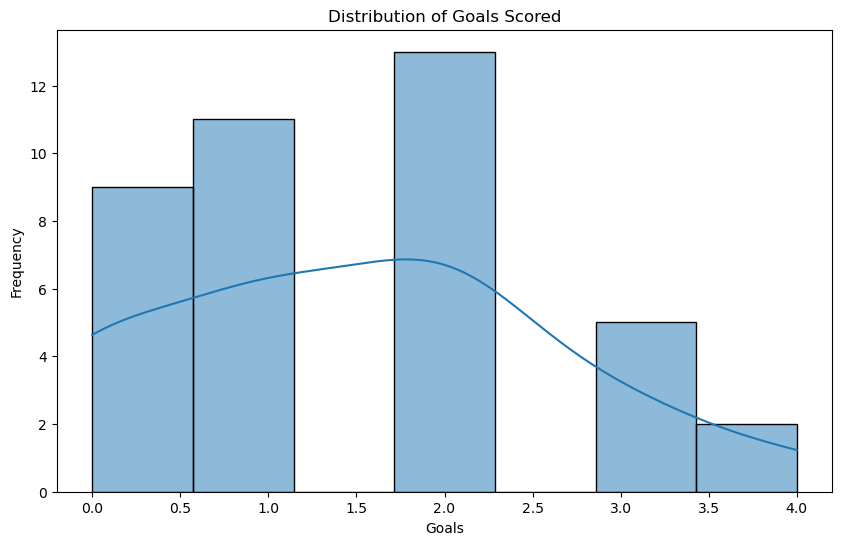

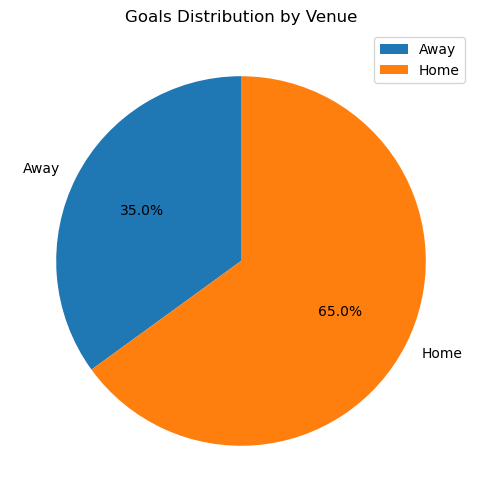

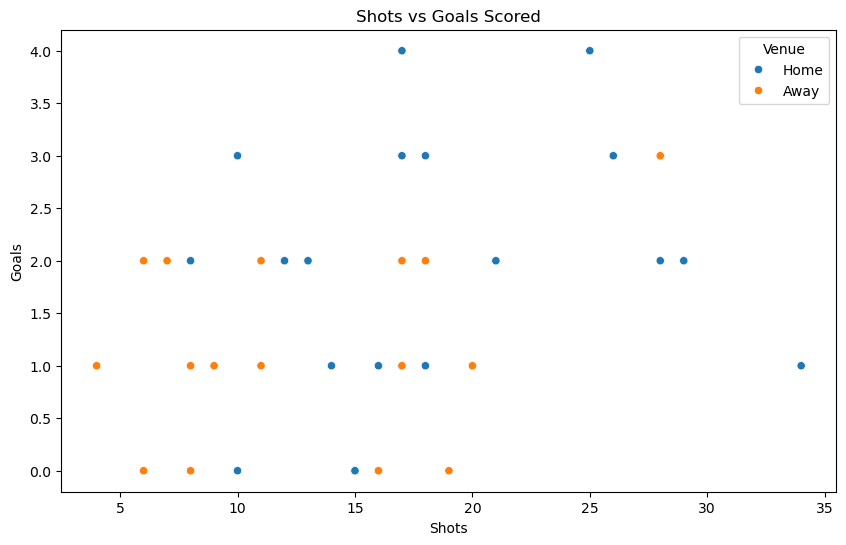

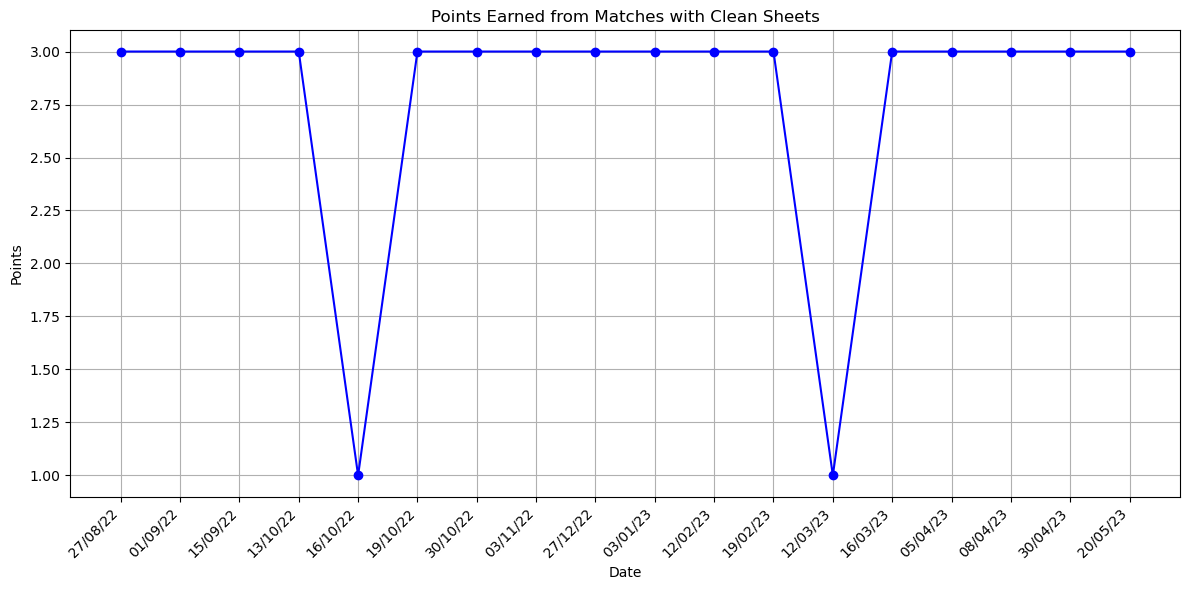

In [25]:
# Define a custom plotting function with a unique name
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_visualizations():
    # Plot histogram of goals
    plt.figure(figsize=(10, 6))
    sns.histplot(md['Goals'], kde=True)
    plt.title('Distribution of Goals Scored')
    plt.xlabel('Goals')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    goals_by_venue = md.groupby('Venue')['Goals'].sum()
    goals_by_venue.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', legend=True)
    plt.title('Goals Distribution by Venue')
    plt.show()
    
    # Plot scatterplot for shots vs. goals
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Shots', y='Goals', data=md, hue='Venue')
    plt.title('Shots vs Goals Scored')
    plt.show()
    
    # Visualization for clean sheets - Line Plot
    plt.figure(figsize=(12, 6))
    plt.plot(clean_sheets['Date'], clean_sheets['Points'], marker='o', linestyle='-', color='blue')
    plt.xticks(rotation=45, ha='right')
    plt.title('Points Earned from Matches with Clean Sheets')
    plt.xlabel('Date')
    plt.ylabel('Points')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# Call the plotting function
plot_visualizations()


# Reflection on results 
Histogram of Goals:

The distribution of goals highlights scoring patterns, such as the most common number of goals scored in matches.
Peaks in the histogram may indicate consistency in scoring, while a spread-out distribution could suggest variability in performance.
Pie Chart of Goals by Venue:

This visualization shows the proportion of goals scored at each venue (e.g., Home vs. Away).
A higher percentage of goals in one venue may reflect a strong home advantage or challenges in away games, providing actionable insights for strategy adjustments.

Scatter Plot of Shots vs. Goals:
The scatter plot reveals the relationship between shots taken and goals scored, with venue distinctions adding context.
Clusters near higher goals and lower shots suggest efficiency, while spread-out points may highlight inefficiency or variability in finishing.

Line Plot for Clean Sheets:
This plot shows the points earned in matches with clean sheets over time.
Consistent upward trends indicate strong defensive performances, while fluctuations may signal inconsistency in preventing goals.

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)